# **Challenge of the Week: Full DL Solution**

---
###**Case Study:** Stroke Prediction

**Objective:** The goal of this challenge is to walk you through a case study where you can apply the deep learning concepts that you learned about during the week. By the end of this challenge, you would have developed a solution that predicts if a person will have a stroke or not.


**Dataset Explanation:** We will be using the stroke dataset. Its features are:


* **id:** unique identifier
* **gender:** "Male", "Female" or "Other"
* **age:** age of the patient
* **hypertension:** 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
* **heart_disease:** 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
* **ever_married:** "No" or "Yes"
* **work_type:** "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
* **Residence_type:** "Rural" or "Urban"
* **avg_glucose_level:** average glucose level in blood
* **bmi:** body mass index
* **smoking_status:** "formerly smoked", "never smoked", "smokes" or "Unknown"*
* **stroke:** 1 if the patient had a stroke or 0 if not

#Importing Libraries

We start by importing the libraries: numpy and pandas

In [ ]:
#Test Your Zaka
import numpy as np
import pandas as pd


#Loading the Dataset

We load the dataset from a csv file, and see its first rows

In [ ]:
#Test Your Zaka
df = pd.DataFrame()
df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

#Exploratory Data Analysis

Now we start the exploratory data analysis.

###Shape of the data

First, you need to know the shape of our data (How many examples and features do we have)

In [ ]:
#Test Your Zaka
df.shape

(5110, 12)

###Types of different Columns

See the type of each of your features and see if you have any nulls

In [ ]:
#Test Your Zaka
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


###Dealing with categorical variables

Now we will walk through the categorical variables that we have to see the categories and the counts of each of them.

'smoking_status'

In [ ]:
#Test Your Zaka
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

'Residence_type'

In [ ]:
#Test Your Zaka
df['Residence_type'].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

'work_type'

In [ ]:
#Test Your Zaka
df['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

'ever_married'

In [ ]:
#Test Your Zaka
df['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

'hypertension'

In [ ]:
#Test Your Zaka
df['hypertension'].value_counts()

0    4612
1     498
Name: hypertension, dtype: int64

'heart_disease'

In [ ]:
#Test Your Zaka
df['heart_disease'].value_counts()

0    4834
1     276
Name: heart_disease, dtype: int64

'stroke'

In [ ]:
#Test Your Zaka
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [ ]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

#Preprocessing

###Dealing with Nulls













###Encoding Categorical Features

Here you will encode those categorical variables to be able to use them to train our DL model.

In [ ]:
#Test Your Zaka
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
 
encoder = LabelEncoder()
df['smoking_status'] = encoder.fit_transform(df['smoking_status'])
df['Residence_type'] = encoder.fit_transform(df['Residence_type'])
df['work_type'] = encoder.fit_transform(df['work_type'])
df['ever_married'] = encoder.fit_transform(df['ever_married'])
df['hypertension'] = encoder.fit_transform(df['hypertension'])
df['heart_disease'] = encoder.fit_transform(df['heart_disease'])
df['stroke'] = encoder.fit_transform(df['stroke'])
df['gender'] = encoder.fit_transform(df['gender'])
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,NaN,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1


Fill the nulls with the mean value, and make sure you have no nulls anymore

In [ ]:
#Test Your Zaka
df['bmi'] = df['bmi'].fillna((df['bmi'].mean()))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   int64  
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   int64  
 6   work_type          5110 non-null   int64  
 7   Residence_type     5110 non-null   int64  
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   int64  
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 479.2 KB


###Normalizing Features

Now you normalize the input data by dividing with the max value of each column.

In [ ]:
#Test Your Zaka
df_max = df.max()
df_max



id                   72940.00
gender                   2.00
age                     82.00
hypertension             1.00
heart_disease            1.00
ever_married             1.00
work_type                4.00
Residence_type           1.00
avg_glucose_level      271.74
bmi                     97.60
smoking_status           3.00
stroke                   1.00
dtype: float64

In [ ]:
 df = df.divide(df_max)
 df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0.124020,0.5,0.817073,0.0,1.0,1.0,0.50,1.0,0.841577,0.375000,0.333333,1.0
1,0.708473,0.0,0.743902,0.0,0.0,1.0,0.75,0.0,0.744130,0.296037,0.666667,1.0
2,0.426542,0.5,0.975610,0.0,1.0,1.0,0.50,0.0,0.389784,0.332992,0.666667,1.0
3,0.825089,0.0,0.597561,0.0,0.0,1.0,0.50,1.0,0.630124,0.352459,1.000000,1.0
4,0.022827,0.0,0.963415,1.0,0.0,1.0,0.75,0.0,0.640760,0.245902,0.666667,1.0


###Removing Unnecessary Features

From the features that we have, remove one that is irrelevant for our predictions

In [ ]:
#Test Your Zaka
df = df.drop(['id'], axis = 1)

#Building the DL Model

Now it's time to build the actual model, and observe a summary of it.<br>
The sizes of the **hidden** layers that you should use are: [32,16,8,4,2].
The activation for each of those hidden layers is 'relu'
<br>
Print the summary of your model.

In [ ]:
#Test Your Zaka
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


model = Sequential()
model.add(Dense(32, input_dim = 10, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(4, activation = 'relu'))
model.add(Dense(2, activation = 'relu'))
model.add(Dense(1, activation = "sigmoid")) 

model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 32)                352       
_________________________________________________________________
dense_19 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_20 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_21 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_22 (Dense)             (None, 2)                 10        
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 3         
Total params: 1,065
Trainable params: 1,065
Non-trainable params: 0
____________________________________________________

###Compiling the model

Now we compile the model. Here we want to measure the accuracy as well as the precision and recall to know better about the performance of our model.
We will use 'adam' as optimizer.

In [ ]:
#Test Your Zaka
import tensorflow as tf
from tensorflow import keras
model = create_model()
model.compile(loss='binary_crossentropy', 
              optimizer = 'adam',
              metrics=['accuracy', tf.keras.metrics.Precision(), 
                        tf.keras.metrics.Recall()])

###Fitting the data

we split our dataset between training and testing, and we fit the model on training data (70%), and validate on the testing data (30%). The training happens for 15 epochs.

In [ ]:
#Test Your Zaka
df.head()
x = df.iloc[:, 0:-1]
y = df.iloc[:,-1]



In [ ]:
np.any(np.isnan(df))

False

In [ ]:
model.fit(x, y, validation_split= 0.30, epochs = 15)

Epoch 1/15
112/112 [==============================] - 2s 6ms/step - loss: 0.6098 - accuracy: 0.9262 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.2914 - val_accuracy: 1.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/15
112/112 [==============================] - 0s 3ms/step - loss: 0.2796 - accuracy: 0.9304 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.0900 - val_accuracy: 1.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/15
112/112 [==============================] - 0s 3ms/step - loss: 0.2566 - accuracy: 0.9304 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.0701 - val_accuracy: 1.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/15
112/112 [==============================] - 0s 3ms/step - loss: 0.2439 - accuracy: 0.9304 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.0731 - val_accuracy: 1.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/15
112/112 [====================

What can you deduce from the results you obtained?

**[Here we can see that the accuracy is high(0.93), but the precisiom and recall are nearly 0 that means that there is high false positive rate and low ratio of correctly predicted positive observations.] **

#Improving DL Models

###Checking For Data Imbalance

Plot a histogram that shows the distribution of 'stroke' column

(array([4861.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         249.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

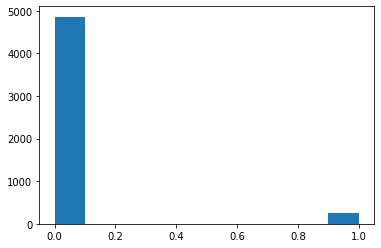

In [ ]:
#Test Your Zaka
import matplotlib.pyplot as plt
plt.hist(df['stroke'])

We have a huge imbalance in the data, this is why we fix it with oversamppling and undersampling.

This time, you will learn to oversample using the SMOTE() function instead of random oversampling, and this is because SMOTE will generate new data based on the data that we have, so we avoid overfitting.

After doing that, plot the new histogram showing the proportions of people having stroke or not

In [ ]:
#Test Your Zaka
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X, Y = sm.fit_sample(x, y.ravel())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


(array([4861.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        4861.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

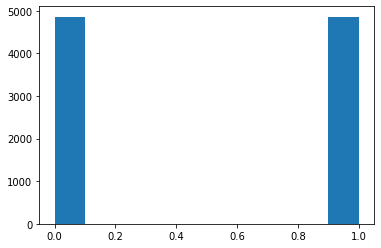

In [ ]:
plt.hist(Y)

Now we will fit our same model on the new balanced data that we have, with the same conditions we had before (train/test splits, epochs, etc)

In [ ]:
#Test Your Zaka
model.fit(X, Y, validation_split= 0.30, epochs = 15)

Epoch 1/15
213/213 [==============================] - 2s 5ms/step - loss: 0.4411 - accuracy: 0.7142 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.9099 - val_accuracy: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/15
213/213 [==============================] - 1s 5ms/step - loss: 0.4263 - accuracy: 0.7843 - precision: 0.6365 - recall: 0.5710 - val_loss: 0.8871 - val_accuracy: 0.6661 - val_precision: 1.0000 - val_recall: 0.6661
Epoch 3/15
213/213 [==============================] - 1s 4ms/step - loss: 0.4206 - accuracy: 0.7960 - precision: 0.6499 - recall: 0.6199 - val_loss: 0.8923 - val_accuracy: 0.6260 - val_precision: 1.0000 - val_recall: 0.6260
Epoch 4/15
213/213 [==============================] - 1s 4ms/step - loss: 0.4151 - accuracy: 0.7965 - precision: 0.6446 - recall: 0.6409 - val_loss: 0.8739 - val_accuracy: 0.6366 - val_precision: 1.0000 - val_recall: 0.6366
Epoch 5/15
213/213 [==============================] - 1s 4ms/step - loss: 0.4107 - a

Comment the performance you obtained

**[Share your Zaka here]**

###Model Design

Now you will introduce batch normalization after each layer of your network

In [ ]:
#Test Your Zaka
from keras.layers import BatchNormalization
def create_batchnormal_model():
    model = Sequential()
    model.add(Dense(32, input_dim = 10, activation = 'relu'))
    model.add(BatchNormalization())
    model.add(Dense(16, activation = 'relu'))
    model.add(BatchNormalization())
    model.add(Dense(8, activation = 'relu'))
    model.add(BatchNormalization())
    model.add(Dense(4, activation = 'relu'))
    model.add(BatchNormalization())
    model.add(Dense(2, activation = 'relu'))
    model.add(BatchNormalization())
    model.add(Dense(1, activation = "sigmoid")) 
    model.compile(optimizer = 'adam', loss='binary_crossentropy', metrics=['accuracy',  tf.keras.metrics.Precision(), 
                        tf.keras.metrics.Recall()])
    return model         


Let's train the model with the same conditions as before

In [ ]:
#Test Your Zaka
modeln = create_batchnormal_model()
modeln.compile(optimizer = 'adam', loss='binary_crossentropy', metrics=['accuracy',  tf.keras.metrics.Precision(), 
                        tf.keras.metrics.Recall()])
modeln.fit(X, Y, validation_split= 0.30, epochs = 15)

Epoch 1/15
213/213 [==============================] - 3s 6ms/step - loss: 0.6030 - accuracy: 0.7362 - precision_2: 0.5417 - recall_2: 0.4979 - val_loss: 0.6907 - val_accuracy: 0.5704 - val_precision_2: 1.0000 - val_recall_2: 0.5704
Epoch 2/15
213/213 [==============================] - 1s 4ms/step - loss: 0.4911 - accuracy: 0.7788 - precision_2: 0.6035 - recall_2: 0.6584 - val_loss: 0.6862 - val_accuracy: 0.6054 - val_precision_2: 1.0000 - val_recall_2: 0.6054
Epoch 3/15
213/213 [==============================] - 1s 4ms/step - loss: 0.4480 - accuracy: 0.7927 - precision_2: 0.6356 - recall_2: 0.6425 - val_loss: 0.6713 - val_accuracy: 0.6507 - val_precision_2: 1.0000 - val_recall_2: 0.6507
Epoch 4/15
213/213 [==============================] - 1s 4ms/step - loss: 0.4255 - accuracy: 0.7925 - precision_2: 0.6354 - recall_2: 0.6420 - val_loss: 0.6766 - val_accuracy: 0.7011 - val_precision_2: 1.0000 - val_recall_2: 0.7011
Epoch 5/15
213/213 [==============================] - 1s 4ms/step - loss

Comment the performance of your model

**[We can say that the model performance has improved, acuuracy is 0.82 while precision and recall have values of 0.69 approximately which means that we have low false positive rate and good ratio of correctly predicted positif]**

###Hyperparameter Tuning

Now we will tune some hyperparameters of our model.

We start by wrapping our model inside a kerasClassifier to be able to use it in Scikit Learn

In [ ]:
#Test Your Zaka
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import sklearn
import tensorflow.keras.wrappers.scikit_learn
model = KerasClassifier(build_fn=create_batchnormal_model, verbose=0)


We will tune the batch size (it can be 50 or 100) and the number of epochs (it can be 50 or 100).
We will use a 3 folds cross validation

In [ ]:
#Test Your Zaka
from sklearn.model_selection import GridSearchCV
hyperparameters = {'batch_size': [50, 100], 'epochs' : [50, 100]}
gridsearch = GridSearchCV(model, hyperparameters, cv=3, verbose=1)

Find the best parameters according to the Grid Search you have done, and the accuracy for the best model.

In [ ]:
#Test Your Zaka
best_model = gridsearch.fit(X, Y)
  
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X, Y))

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:  4.3min finished


The mean accuracy of the model is: 0.9002262949943542


In [ ]:
print('Mean Accuracy: %.3f' % best_model.best_score_)
print('Config: %s' % best_model.best_params_)

Mean Accuracy: 0.808
Config: {'batch_size': 50, 'epochs': 100}


Fit the model on the best hyperparameters we obtained.

In [ ]:
#Test Your Zaka
modeln.fit(X, Y, validation_split= 0.30, epochs = 100, batch_size=100)


Epoch 1/100
69/69 [==============================] - 0s 5ms/step - loss: 0.3355 - accuracy: 0.8409 - precision_2: 0.7186 - recall_2: 0.7279 - val_loss: 0.7713 - val_accuracy: 0.5629 - val_precision_2: 1.0000 - val_recall_2: 0.5629
Epoch 2/100
69/69 [==============================] - 0s 4ms/step - loss: 0.3339 - accuracy: 0.8423 - precision_2: 0.7194 - recall_2: 0.7346 - val_loss: 0.7390 - val_accuracy: 0.6068 - val_precision_2: 1.0000 - val_recall_2: 0.6068
Epoch 3/100
69/69 [==============================] - 0s 4ms/step - loss: 0.3313 - accuracy: 0.8422 - precision_2: 0.7171 - recall_2: 0.7392 - val_loss: 0.6192 - val_accuracy: 0.7168 - val_precision_2: 1.0000 - val_recall_2: 0.7168
Epoch 4/100
69/69 [==============================] - 0s 5ms/step - loss: 0.3309 - accuracy: 0.8391 - precision_2: 0.7132 - recall_2: 0.7305 - val_loss: 0.6660 - val_accuracy: 0.6651 - val_precision_2: 1.0000 - val_recall_2: 0.6651
Epoch 5/100
69/69 [==============================] - 0s 4ms/step - loss: 0.3

Comment the performance of your model

**[We can clearly say that the performance has evaluated; accuracy is now 0.87, precision 0.77 and recall 0.79 which is a good performance]**